# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv(r"D:\Innomatics\Machine Learning\Project\Data Set\credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
data=data.dropna()

# Identifying the features and Target variable

In [5]:
X=data.copy(deep=True)
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
X.drop("loan_status",axis=1,inplace=True)

In [7]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [8]:
Y=data["loan_status"]
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

# Identifying the ML task and Evaluation Metric

## 1) we need to perform classification algorithms under supervized learning

## 2) we choose Accuracy as the Evaluation metric

# Splitting  the data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=20)

In [10]:
x_train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
x_test.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Separating Numerical and Categorical columns in train and test data

In [12]:
x_train_num=x_train.select_dtypes(include=["int64","float64"])
x_train_cat=x_train.select_dtypes(exclude=["int64","float64"])

In [13]:
x_train_cat.loan_grade.unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

# Train data categorical encoding

In [14]:
X_train_cat_le = pd.DataFrame(index=x_train_cat.index)

X_train_cat_le.head()

""
20708
30668
5521
11177
3435


In [15]:
grade_encoder = {'G':1, 'F':2, 'E':3, 'D':4, 'C':5, 'B':6, 'A':7}

X_train_cat_le['loan_grade'] = x_train_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

,loan_grade
20708,6
30668,5
5521,6
11177,6
3435,4


In [16]:
x_train_cat.drop("loan_grade",axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

df_cat = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                      columns=encoder.get_feature_names_out(x_train_cat.columns),index=x_train_cat.index)
df_cat.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20708,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3435,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
X_train_cat_encoded = pd.concat([df_cat, X_train_cat_le], axis=1)

X_train_cat_encoded.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20708,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
30668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
5521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
3435,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4


In [19]:
X_train_transformed = pd.concat([x_train_num, X_train_cat_encoded], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20708,27,35004,7.0,5000,10.75,0.14,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
30668,46,60000,1.0,5000,11.72,0.08,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
5521,22,45000,3.0,4000,11.83,0.09,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11177,24,72000,8.0,18000,11.86,0.25,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
3435,24,34000,3.0,10800,14.42,0.32,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4


In [20]:
X_train_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

# Missing values imputation with KNN imputer

# Train data imputing

In [21]:
from sklearn.impute import KNNImputer
Knn=KNNImputer()
x_train_trm=pd.DataFrame(Knn.fit_transform(X_train_transformed),columns=X_train_transformed.columns, 
                               index = X_train_transformed.index)

In [22]:
x_train_trm.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

In [23]:
x_train_trm.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20708,27.0,35004.0,7.0,5000.0,10.75,0.14,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
30668,46.0,60000.0,1.0,5000.0,11.72,0.08,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
5521,22.0,45000.0,3.0,4000.0,11.83,0.09,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
11177,24.0,72000.0,8.0,18000.0,11.86,0.25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
3435,24.0,34000.0,3.0,10800.0,14.42,0.32,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0


# Test data categorical encoding

In [24]:
x_test_num=x_test.select_dtypes(include=["int64","float64"])
x_test_cat=x_test.select_dtypes(exclude=["int64","float64"])

In [25]:
X_test_cat_le = pd.DataFrame(index=x_test_cat.index)

X_test_cat_le.head()

""
17416
19488
27879
24872
25189


In [26]:
X_test_cat_le['loan_grade'] = x_test_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_test_cat_le.head()

,loan_grade
17416,4
19488,4
27879,4
24872,3
25189,5


In [27]:
x_test_cat.drop("loan_grade",axis=1,inplace=True)

In [28]:
df_test_cat = pd.DataFrame(encoder.transform(x_test_cat), 
                      columns=encoder.get_feature_names_out(x_test_cat.columns),index=x_test_cat.index)
df_test_cat.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
17416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
24872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
X_test_cat_encoded = pd.concat([df_test_cat, X_test_cat_le], axis=1)

X_test_cat_encoded.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
17416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
19488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
27879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4
24872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
25189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


In [30]:
X_test_transformed = pd.concat([x_test_num, X_test_cat_encoded], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
17416,26,52000,10.0,5000,15.65,0.10,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
19488,31,44000,4.0,12000,17.27,0.27,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
27879,33,71000,17.0,19600,16.07,0.28,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4
24872,28,77544,2.0,15000,16.63,0.19,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
25189,29,80496,2.0,10000,13.72,0.12,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


In [31]:
X_test_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

# test data imputing

In [32]:
x_test_trm=pd.DataFrame(Knn.transform(X_test_transformed),columns=X_test_transformed.columns, 
                               index = X_test_transformed.index)

In [33]:
x_test_trm.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

# Scaling the numerical features for train data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20708,-0.117457,-0.484247,0.531092,-0.732208,-0.093531,-0.275019,0.538879
30668,2.866369,-0.100567,-0.919447,-0.732208,0.206700,-0.839450,2.507589
5521,-0.902675,-0.330811,-0.435934,-0.890298,0.240747,-0.745378,-0.691565
11177,-0.588588,0.083629,0.772849,1.322967,0.250032,0.759771,-0.445476
3435,-0.588588,-0.499658,-0.435934,0.184717,1.042394,1.418274,-0.445476


In [35]:
X_train_final_transform = pd.concat([X_train_num_rescaled, X_train_cat_encoded], axis=1)

X_train_final_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20708,-0.117457,-0.484247,0.531092,-0.732208,-0.093531,-0.275019,0.538879,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
30668,2.866369,-0.100567,-0.919447,-0.732208,0.206700,-0.839450,2.507589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
5521,-0.902675,-0.330811,-0.435934,-0.890298,0.240747,-0.745378,-0.691565,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11177,-0.588588,0.083629,0.772849,1.322967,0.250032,0.759771,-0.445476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
3435,-0.588588,-0.499658,-0.435934,0.184717,1.042394,1.418274,-0.445476,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4


# Test data (outliers)

# Scaling the numerical features for test data

In [36]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num), 
                                    columns = x_test_num.columns, 
                                    index = x_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17416,-0.274501,-0.223364,1.256362,-0.732208,1.423099,-0.651307,-0.445476
19488,0.510717,-0.346161,-0.194177,0.374425,1.924515,0.947914,0.292790
27879,0.824804,0.068280,2.948658,1.575912,1.553096,1.041986,0.046702
24872,0.039586,0.168728,-0.677690,0.848696,1.726425,0.195340,-0.199387
25189,0.196630,0.214040,-0.677690,0.058244,0.825732,-0.463163,1.031057


In [37]:
X_test_final_transform = pd.concat([X_test_num_rescaled, X_test_cat_encoded], axis=1)

X_test_final_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
17416,-0.274501,-0.223364,1.256362,-0.732208,1.423099,-0.651307,-0.445476,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
19488,0.510717,-0.346161,-0.194177,0.374425,1.924515,0.947914,0.292790,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
27879,0.824804,0.068280,2.948658,1.575912,1.553096,1.041986,0.046702,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4
24872,0.039586,0.168728,-0.677690,0.848696,1.726425,0.195340,-0.199387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
25189,0.196630,0.214040,-0.677690,0.058244,0.825732,-0.463163,1.031057,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


# MODEL building

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_final_transform, y_train)

KNeighborsClassifier()

In [39]:
y_test_pred = classifier.predict(X_test_final_transform)

In [40]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
17416,0,1
19488,1,1
27879,1,0
24872,0,0
25189,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

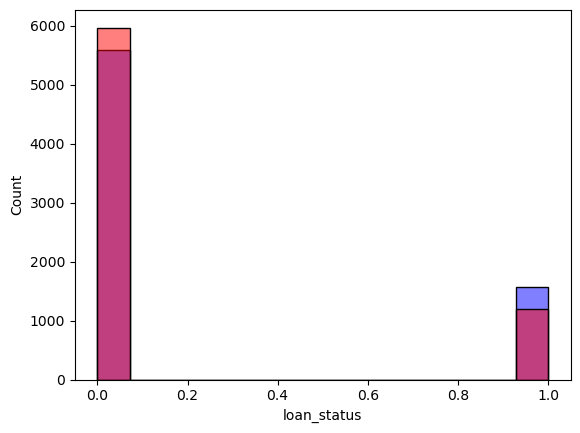

In [41]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [42]:
from sklearn import metrics
print('Accuracy : ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy :  0.895391061452514


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_final_transform, y_train)

LogisticRegression()

In [44]:
y_test_pred = classifier.predict(X_test_final_transform)

In [45]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
17416,0,0
19488,1,1
27879,1,1
24872,0,1
25189,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

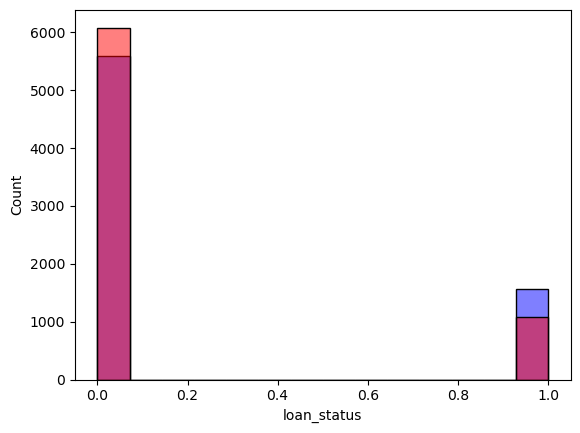

In [46]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [47]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy :  0.8516759776536312


# Support Vector Machines

In [48]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_final_transform, y_train)

SVC()

In [49]:
y_test_pred = classifier.predict(X_test_final_transform)

In [50]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
17416,0,0
19488,1,1
27879,1,0
24872,0,1
25189,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

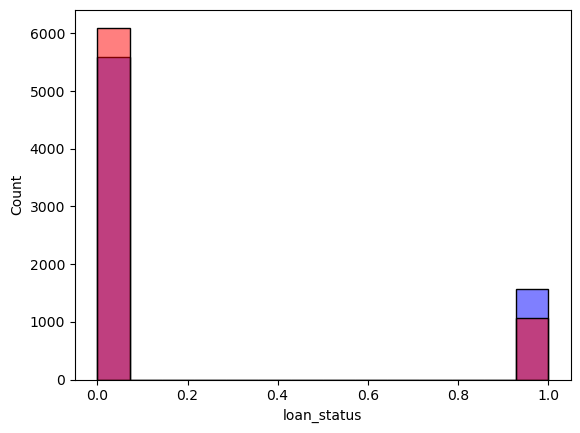

In [51]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [52]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy :  0.8903631284916201


# DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_final_transform, y_train)

DecisionTreeClassifier()

In [54]:
y_test_pred = classifier.predict(X_test_final_transform)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
17416,0,0
19488,1,1
27879,1,0
24872,0,0
25189,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

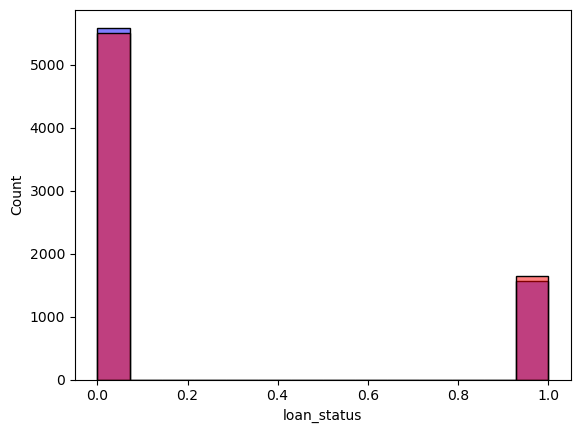

In [56]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [57]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy :  0.8878491620111731


# Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_final_transform, y_train)

RandomForestClassifier()

In [59]:
y_test_pred = classifier.predict(X_test_final_transform)

In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
17416,0,0
19488,1,1
27879,1,0
24872,0,0
25189,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

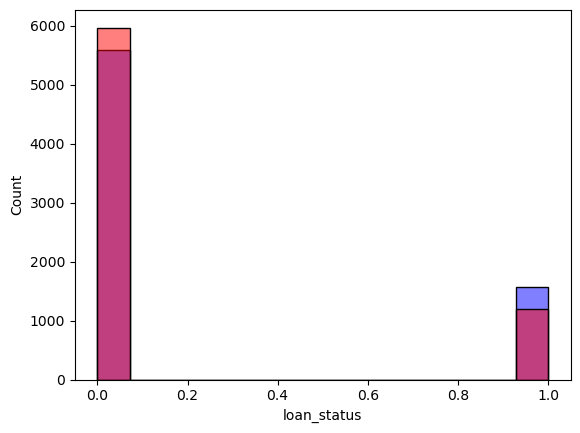

In [61]:

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [62]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy :  0.9351955307262569


### Best Algorthim :Random Forest Classifier